In [32]:
!pip install streamlit
!pip install yfinance
import streamlit as st
import yfinance as yf

In [33]:
!pip install opendatasets

In [34]:
import opendatasets as od
import os

In [35]:
datasets= 'https://www.kaggle.com/datasets/aavigan/consumer-price-index-usa-all-items'
od.download(datasets)

Skipping, found downloaded files in "./consumer-price-index-usa-all-items" (use force=True to force download)


In [36]:
os.listdir('consumer-price-index-usa-all-items')

['USACPIALLMINMEI.csv']

In [37]:
import pandas as pd

In [38]:
df= pd.read_csv('consumer-price-index-usa-all-items/USACPIALLMINMEI.csv')
df

,DATE,USACPIALLMINMEI
0,1960-01-01,12.361982
1,1960-02-01,12.404174
2,1960-03-01,12.404174
3,1960-04-01,12.446365
4,1960-05-01,12.446365
...,...,...
714,2019-07-01,108.250041
715,2019-08-01,108.244556
716,2019-09-01,108.329360
717,2019-10-01,108.577022


In [39]:
df= df.set_index('DATE')
df

,USACPIALLMINMEI
DATE,
1960-01-01,12.361982
1960-02-01,12.404174
1960-03-01,12.404174
1960-04-01,12.446365
1960-05-01,12.446365
...,...
2019-07-01,108.250041
2019-08-01,108.244556
2019-09-01,108.329360


In [40]:
cpi= df.loc['2018-01-01':'2018-12-01']
cpi

,USACPIALLMINMEI
DATE,
2018-01-01,104.577731
2018-02-01,105.051958
2018-03-01,105.289494
2018-04-01,105.708029
2018-05-01,106.147660
2018-06-01,106.316846
2018-07-01,106.324019
2018-08-01,106.383086
2018-09-01,106.506706


In [41]:
data= yf.download("DXY", start='2018-01-01', end='2018-12-30')
usd_index= data.resample('MS').first()
usd_index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1145.209961,1145.209961,1145.209961,1145.209961,1145.209961,0
2018-02-01,1273.810059,1273.810059,1273.810059,1273.810059,1273.810059,0
2018-03-01,1129.449951,1129.449951,1129.449951,1129.449951,1129.449951,0
2018-04-01,1111.380005,1111.380005,1111.380005,1111.380005,1111.380005,0
2018-05-01,1178.770020,1178.770020,1178.770020,1178.770020,1178.770020,0
2018-06-01,1058.109985,1058.109985,1058.109985,1058.109985,1058.109985,0
2018-07-01,967.780029,967.780029,967.780029,967.780029,967.780029,0
2018-08-01,994.989990,994.989990,994.989990,994.989990,994.989990,0
2018-09-01,927.260010,927.260010,927.260010,927.260010,927.260010,0


In [42]:
usd_index.reset_index(inplace=True)

usd_index['Date'] = pd.to_datetime(usd_index['Date'])

usd_index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,1145.209961,1145.209961,1145.209961,1145.209961,1145.209961,0
1,2018-02-01,1273.810059,1273.810059,1273.810059,1273.810059,1273.810059,0
2,2018-03-01,1129.449951,1129.449951,1129.449951,1129.449951,1129.449951,0
3,2018-04-01,1111.380005,1111.380005,1111.380005,1111.380005,1111.380005,0
4,2018-05-01,1178.770020,1178.770020,1178.770020,1178.770020,1178.770020,0
5,2018-06-01,1058.109985,1058.109985,1058.109985,1058.109985,1058.109985,0
6,2018-07-01,967.780029,967.780029,967.780029,967.780029,967.780029,0
7,2018-08-01,994.989990,994.989990,994.989990,994.989990,994.989990,0
8,2018-09-01,927.260010,927.260010,927.260010,927.260010,927.260010,0
9,2018-10-01,915.570007,915.570007,915.570007,915.570007,915.570007,0


In [43]:
cpi.reset_index(inplace=True)

cpi['DATE'] = pd.to_datetime(cpi['DATE'])
cpi

<ipython-input-43-60f421badd21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi['DATE'] = pd.to_datetime(cpi['DATE'])


,DATE,USACPIALLMINMEI
0,2018-01-01,104.577731
1,2018-02-01,105.051958
2,2018-03-01,105.289494
3,2018-04-01,105.708029
4,2018-05-01,106.147660
5,2018-06-01,106.316846
6,2018-07-01,106.324019
7,2018-08-01,106.383086
8,2018-09-01,106.506706
9,2018-10-01,106.694878


In [44]:
usd_index= usd_index.set_index('Date')
usd_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1145.209961,1145.209961,1145.209961,1145.209961,1145.209961,0
2018-02-01,1273.810059,1273.810059,1273.810059,1273.810059,1273.810059,0
2018-03-01,1129.449951,1129.449951,1129.449951,1129.449951,1129.449951,0
2018-04-01,1111.380005,1111.380005,1111.380005,1111.380005,1111.380005,0
2018-05-01,1178.770020,1178.770020,1178.770020,1178.770020,1178.770020,0
2018-06-01,1058.109985,1058.109985,1058.109985,1058.109985,1058.109985,0
2018-07-01,967.780029,967.780029,967.780029,967.780029,967.780029,0
2018-08-01,994.989990,994.989990,994.989990,994.989990,994.989990,0
2018-09-01,927.260010,927.260010,927.260010,927.260010,927.260010,0


In [45]:
cpi= cpi.rename(columns={'DATE':'Date'})
cpi

,Date,USACPIALLMINMEI
0,2018-01-01,104.577731
1,2018-02-01,105.051958
2,2018-03-01,105.289494
3,2018-04-01,105.708029
4,2018-05-01,106.147660
5,2018-06-01,106.316846
6,2018-07-01,106.324019
7,2018-08-01,106.383086
8,2018-09-01,106.506706
9,2018-10-01,106.694878


In [46]:
cpi= cpi.set_index('Date')
cpi

,USACPIALLMINMEI
Date,
2018-01-01,104.577731
2018-02-01,105.051958
2018-03-01,105.289494
2018-04-01,105.708029
2018-05-01,106.147660
2018-06-01,106.316846
2018-07-01,106.324019
2018-08-01,106.383086
2018-09-01,106.506706


In [47]:
new_data= pd.concat([cpi, usd_index['Close']], axis=1)
new_data

,USACPIALLMINMEI,Close
Date,,
2018-01-01,104.577731,1145.209961
2018-02-01,105.051958,1273.810059
2018-03-01,105.289494,1129.449951
2018-04-01,105.708029,1111.380005
2018-05-01,106.147660,1178.770020
2018-06-01,106.316846,1058.109985
2018-07-01,106.324019,967.780029
2018-08-01,106.383086,994.989990
2018-09-01,106.506706,927.260010


In [48]:
new_data.corr()

,USACPIALLMINMEI,Close
USACPIALLMINMEI,1.000000,-0.676691
Close,-0.676691,1.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Close', ylabel='USACPIALLMINMEI'>

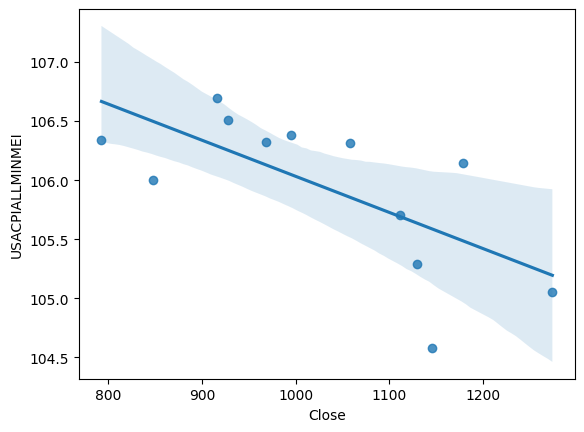

In [50]:
sns.regplot(x='Close', y='USACPIALLMINMEI',data=new_data)

<Axes: xlabel='Date'>

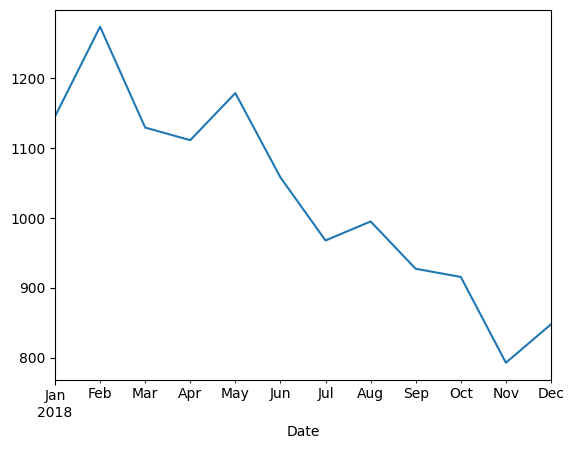

In [51]:
new_data['Close'].plot()


<Axes: xlabel='Date'>

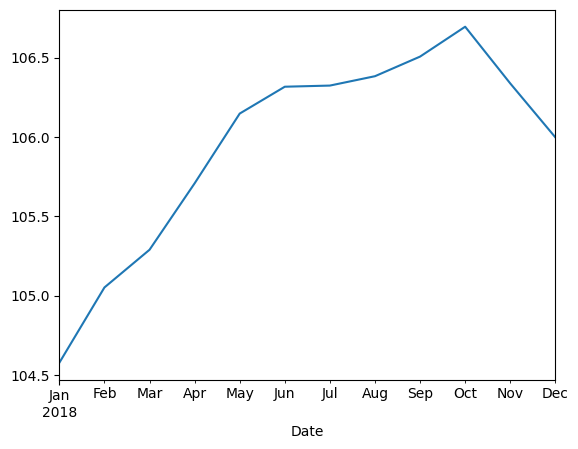

In [52]:
new_data['USACPIALLMINMEI'].plot()

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
import numpy as np

In [55]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Rest of your code...
dsets = np.random.rand(len(new_data)) < 0.7
fea = new_data[['Close', 'USACPIALLMINMEI']]
train = fea[dsets]
test = fea[~dsets]
train_x = np.asanyarray(train[['USACPIALLMINMEI']])
test_x = np.asanyarray(test[['Close']])
train_y = np.asanyarray(train[['USACPIALLMINMEI']])
test_y = np.asanyarray(test[['Close']])


In [56]:
print(train_x.shape[0], test_x.shape)

7 (5, 1)


In [57]:
lr= LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [58]:
predict= lr.predict(test_x)
predict[:5]

array([[1273.81005859],
       [1129.44995117],
       [ 994.98999023],
       [ 915.57000732],
       [ 847.7199707 ]])

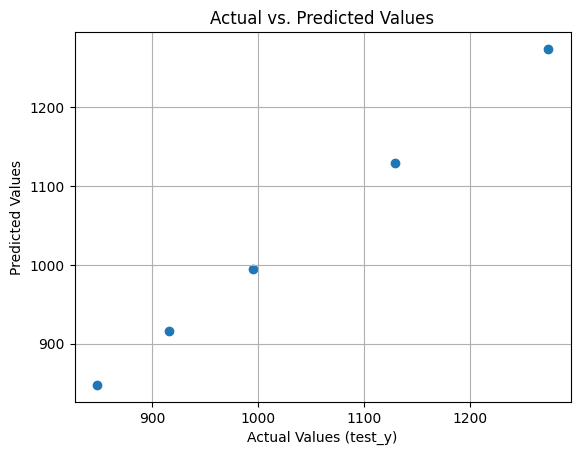

In [63]:
plt.scatter(test_y, predict)
plt.xlabel('Actual Values (test_y)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.title('Actual vs. Predicted Values')
plt.show()


In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predict)
rmse = np.sqrt(mse)
rmse

1.686248307827478e-13

In [69]:
usa= yf.download("DXY", start='2019-01-01', end='2019-12-30')
usd_= usa.resample('MS').first()
usd_

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,762.869995,762.869995,762.869995,762.869995,762.869995,0.0
2019-02-01,772.539978,772.539978,772.539978,772.539978,772.539978,0.0
2019-03-01,896.210022,896.210022,896.210022,896.210022,896.210022,0.0
2019-04-01,941.469971,941.469971,941.469971,941.469971,941.469971,0.0
2019-05-01,955.700012,955.700012,955.700012,955.700012,955.700012,0.0
2019-06-01,1067.890015,1067.890015,1067.890015,1067.890015,1067.890015,0.0
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'The Next Year Price(2019) shows It increased')

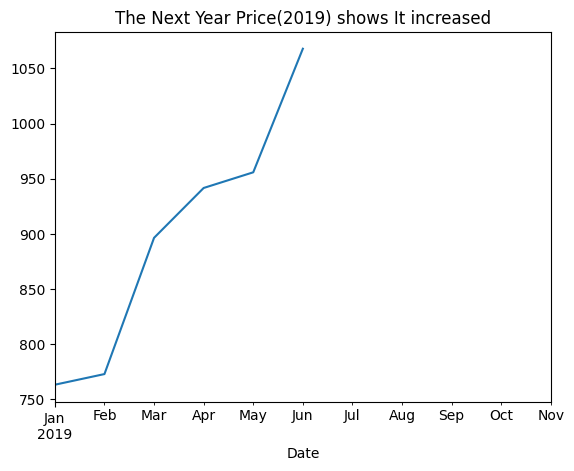

In [70]:
usd_['Close'].plot()
plt.title("The Next Year Price(2019) shows It increased")